# Applied Machine Learning: Unsupervised Learning

## Preamble and Datasets

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import os
from pathlib import Path
base_dir = os.path.join('',Path(os.getcwd()).parents[0])
data_dir = os.path.join(base_dir, 'Data')

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
fruits = pd.read_table(data_dir+'/fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] -1

label_fruit = dict(zip(y_fruits['fruit_label'].unique(),fruits['fruit_name'].unique()))
label_fruit

{0: 'apple', 1: 'mandarin', 2: 'orange', 3: 'lemon'}

## 1.- Dimensionality Reduction and Manifold Learning

### 1.1.- Principal Component Analysis (PCA)

#### Using PCA to find the first two principal components of the breast cancer dataset

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

scaler = StandardScaler()

cancer = load_breast_cancer()
(X_cancer,y_cancer) = load_breast_cancer(return_X_y=True)

X_normalized = scaler.fit_transform(X_cancer)
pca = PCA(n_components=2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

print(X_cancer.shape,X_pca.shape)
print(X_pca)
labels = dict(zip(pd.Series(y_cancer).unique(),cancer.target_names))
labels

(569, 30) (569, 2)
[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


{0: 'malignant', 1: 'benign'}

#### Plotting the PCA-transformed version of the breast cancer dataset

<IPython.core.display.Javascript object>


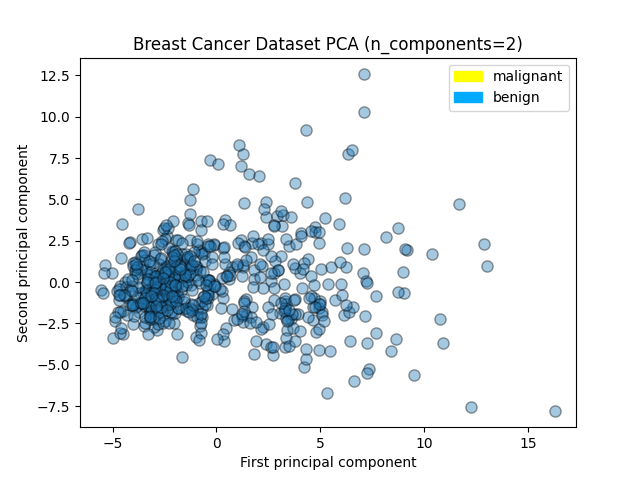

In [3]:
from adspy_shared_utilities import plot_labelled_scatter

plot_labelled_scatter(X_pca, y_cancer, list(cancer.target_names))
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components=2)')
plt.show()

*In this example, we've used the dataset that has labels for supervised learning; namely, the malignant and benign labels on cancer cells. So we can see how well PCA serves to find clusters in the data. Here's the result of plotting all the 30 feature data samples using the two new features computed with PCA. We can see that the malignant and benign cells do indeed tend to cluster into two groups in the space*

*In fact, we could now apply a linear classifier to this two-dimensional representation of the original dataset and we can see that it would likely do fairly well. This illustrates another use of dimensionality reduction methods like PCA to find informative features that could then be used in a later supervised learning stage*

#### Plotting the magnitude of each feature value for the first two principal components

<IPython.core.display.Javascript object>


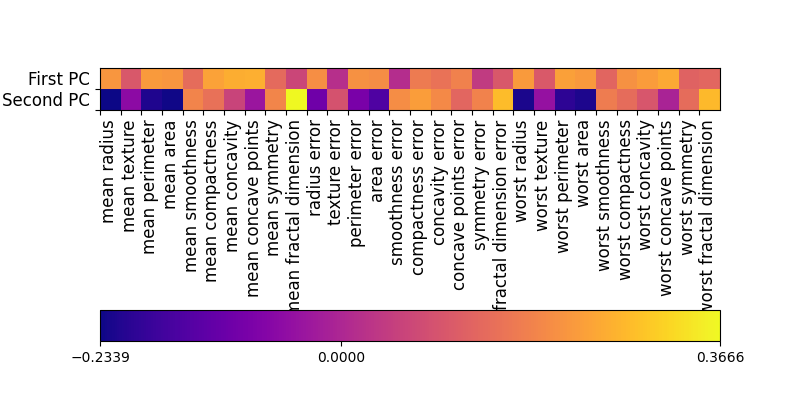

In [4]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5,len(feature_names)-1));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

#### Applying PCA on fruit dataset

-5.72047117772962e-16


<IPython.core.display.Javascript object>


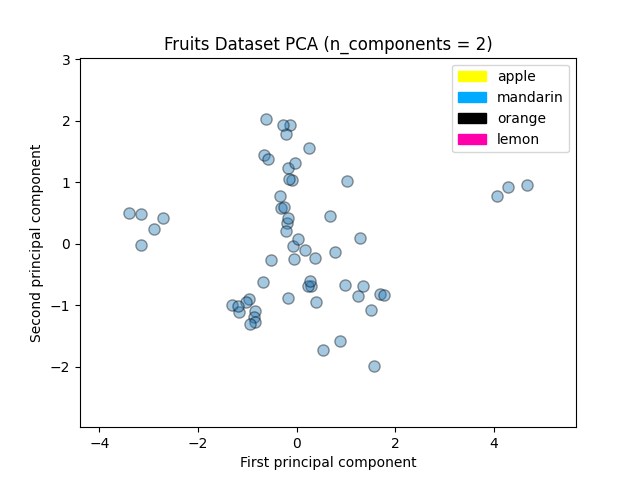

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit_transform(X_fruits)
print(X_normalized.mean())

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_fruits, ['apple','mandarin','orange','lemon'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

### 1.2.- Manifold learning methods

<IPython.core.display.Javascript object>


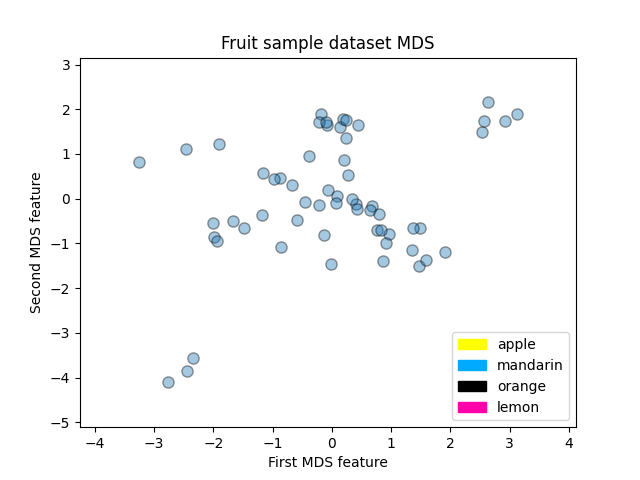

In [6]:
# Multidimensional scaling

from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit_transform(X_fruits)
mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds,y_fruits,['apple','mandarin','orange','lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

#### 1.2.1.- Multidimensional scaling (MDS) on the breast cancer dataset

<IPython.core.display.Javascript object>


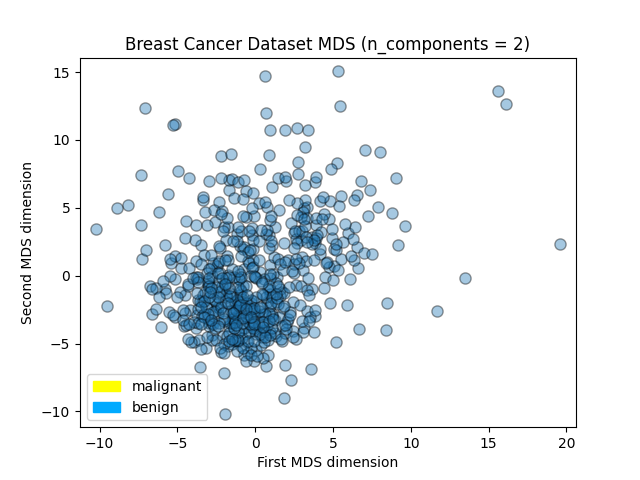

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

from adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

#### 1.2.2.- t-SNE on the fruit dataset

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<IPython.core.display.Javascript object>


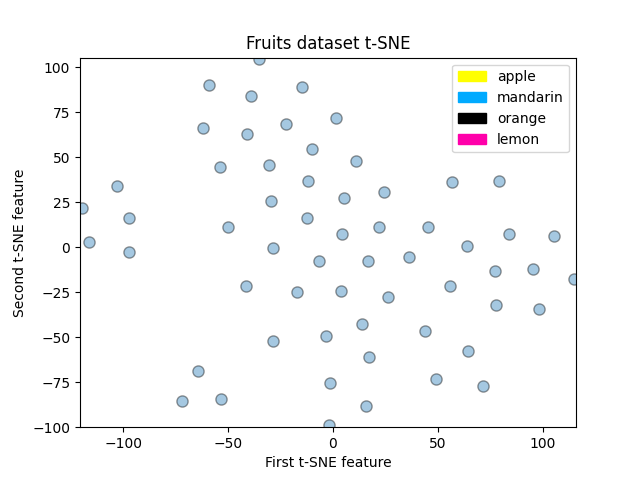

Text(0.5, 1.0, 'Fruits dataset t-SNE')

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=0)
X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne,y_fruits,['apple','mandarin','orange','lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE')

#### t-SNE on the breast cancer dataset

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<IPython.core.display.Javascript object>


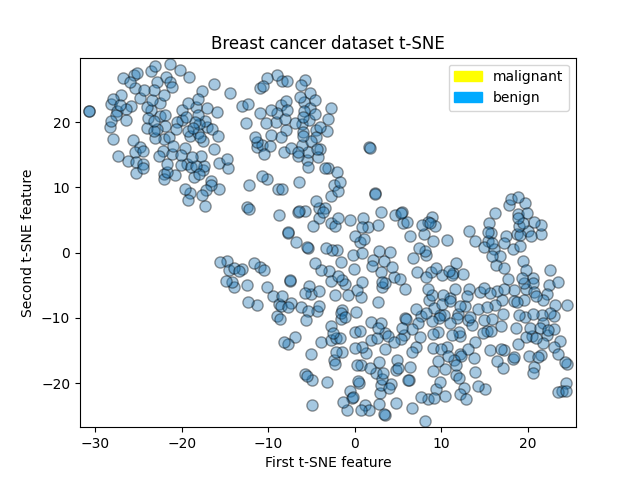

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');

## 2- Clustering

### 2.1.- K-means

<IPython.core.display.Javascript object>


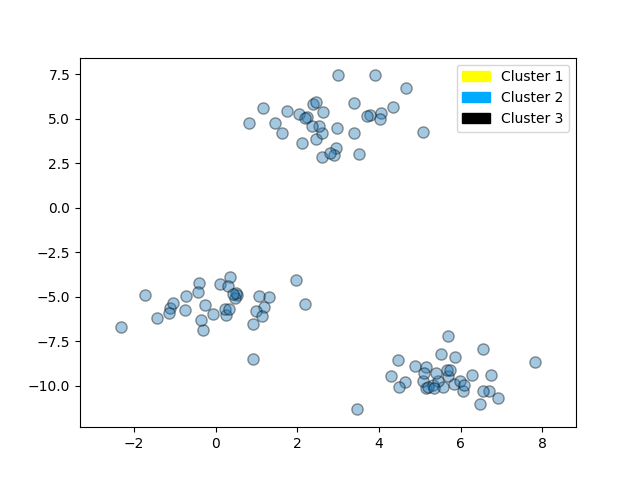

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X,y = make_blobs(random_state = 10)
kmeans = KMeans(n_clusters = 3).fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

<IPython.core.display.Javascript object>


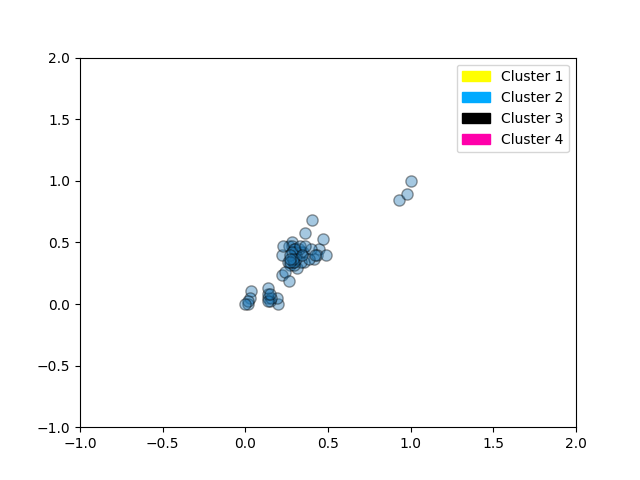

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table(data_dir+'/fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height','color_score']].values
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit_transform(X_fruits)
kmeans = KMeans(n_clusters=4,random_state=0).fit(X_fruits) # n_clusters is the stopping condition for this process

plot_labelled_scatter(X_fruits_normalized,kmeans.labels_,['Cluster 1','Cluster 2','Cluster 3', 'Cluster 4'])

*Example showing k-means used to find 4 clusters in the fruits dataset.  Note that in general, it's important to scale the individual features before applying k-means clustering.*

**Limitations of k-means**

* Work well for simple clusters that are the same size, well-separated, globular shapes.
* Does not do well with irregular, complex clusters

### 2.2.- Agglomerative Clustering

[2 2 1 0 1 1 0 2 1 0 0 1 1 2 2 1 0 1 0 1 0 2 1 2 0 1 1 1 1 0 2 1 1 0 2 2 2
 1 1 1 2 0 2 2 1 0 0 0 2 0 1 2 0 0 2 0 1 2 0 0 1 1 2 2 2 0 0 2 2 2 1 0 1 1
 2 1 1 2 0 0 0 1 0 1 2 1 2 0 2 2 0 0 0 2 2 2 1 0 0 0]
[1 1 0 2 0 0 2 1 0 2 2 0 0 1 1 0 2 0 2 0 2 1 0 1 2 0 0 0 0 2 1 0 0 2 1 1 1
 0 0 0 1 2 1 1 0 2 2 2 1 2 0 1 2 2 1 2 0 1 2 2 0 0 1 1 1 2 2 1 1 1 0 2 0 0
 1 0 0 1 2 2 2 0 2 0 1 0 1 2 1 1 2 2 2 1 1 1 0 2 2 2] 
 [2 2 1 0 1 1 0 2 1 0 0 1 1 2 2 1 0 1 0 1 0 2 1 2 0 1 1 1 1 0 2 1 1 0 2 2 2
 1 1 1 2 0 2 2 1 0 0 0 2 0 1 2 0 0 2 0 1 2 0 0 1 1 2 2 2 0 0 2 2 2 1 0 1 1
 2 1 1 2 0 0 0 1 0 1 2 1 2 0 2 2 0 0 0 2 2 2 1 0 0 0]


<IPython.core.display.Javascript object>


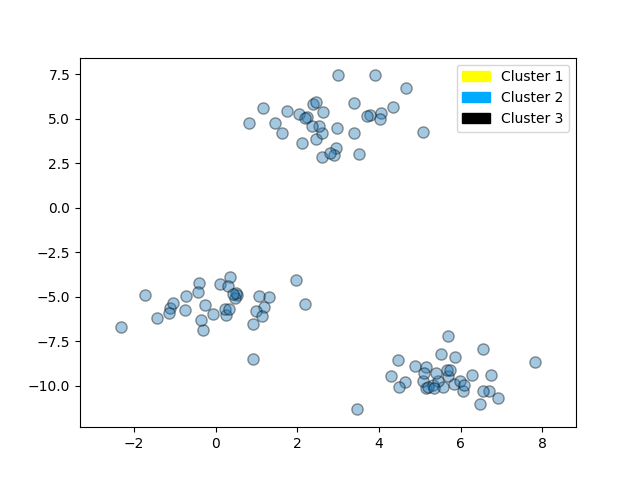

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X,y = make_blobs(random_state = 10) # Generate isotropic Gaussian blobs for clustering
print(y)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

X,y = make_blobs(random_state = 10)
print(cls_assignment,'\n',y) # prediction of y using the first make_blobs iteration of X through AggClustering assignment
plot_labelled_scatter(X,cls_assignment,['Cluster 1','Cluster 2', 'Cluster 3'])
# Comparing the cluster assignment that works as a prediction of y over the "first" X,
# with the second random make_blobs iteration

### 2.3.- Hierarchical Clustering - Creating a dendogram through scipy package

<IPython.core.display.Javascript object>


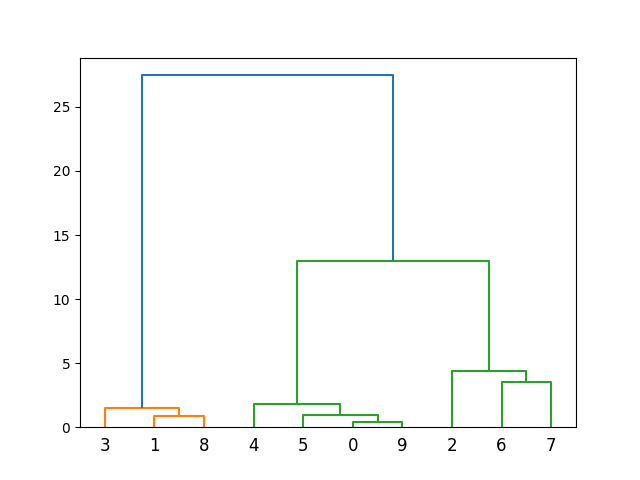

In [13]:
from scipy.cluster.hierarchy import ward,dendrogram
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X,y = make_blobs(random_state=10,n_samples=10)
plt.figure()
dendrogram(ward(X))
plt.show()

*Only easy to apply and interpret in some special kind of data, as it could be biomedical datasets including evolutive data with some relationship btw instances. In the kind of data sets in which k-means and agglomerative clustering perform well, normally HierarchicalClustering would not.*

### 2.4.- DBSCAN clustering

y-values: [0 1 0 2 0 0 0 2 2 1 1 2 0 0 2 0 0 1 1 1 1 2 2 2 1] 

Cluster membership values:
AgglomerativeClustering(n_clusters=3)

Cluster density:
 AgglomerativeClustering(n_clusters=3)    1
dtype: int64


<IPython.core.display.Javascript object>


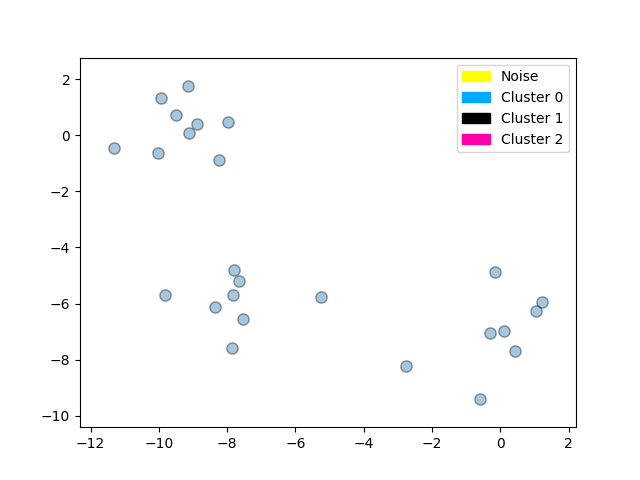

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)
print('y-values:',y,'\n')
dbscan = DBSCAN(eps=2,min_samples=2)

dbscan = dbscan.fit_predict(X)
print('Cluster membership values:\n{}\n'.format(cls))
print('Cluster density:\n {}'.format((pd.Series(cls).replace(-1,'Noise')).value_counts()))
plot_labelled_scatter(X,y,['Noise', 'Cluster 0','Cluster 1','Cluster 2']) # The label -1 indicates NOISE

With DBSCAN, if you've scaled your data using a standard scalar or min-max scalar to make sure the feature values have comparable ranges, finding an appropriate value for eps is a bit easier to do.

**Evaluation & Interpretation**

* Unlike supervised learning, where we have existing labels or target values to use for evaluating the effectiveness of the learning method, it can be difficult to evaluate unsupervised learning algorithms automatically. Since there's typically no ground truth to compare against.


* A typical issue with evaluating clustering algorithms is that it can be hard to automatically interpret or label the meaning of the clusters that are found. And this is still a step that requires human expertise to judge.